# **Modul 6 - Histogram, Histogram Equalization, Dithering**

## **Laporan Praktikum Mata Kuliah Pengolahan Citra dan Visi Komputer oleh:**

### Hanifah Amany

### TI-3E/16

[Link GitHub](https://github.com/hanifahamany/PCVK_Ganjil_2024/tree/main/Week_6_Hanifah)

##   **Tugas Praktikum**

1.   Import folder di Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.   Import library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.   Membuat Histogram dengan gambar lena.jpg

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Week_6_Hanifah/lena.jpg')

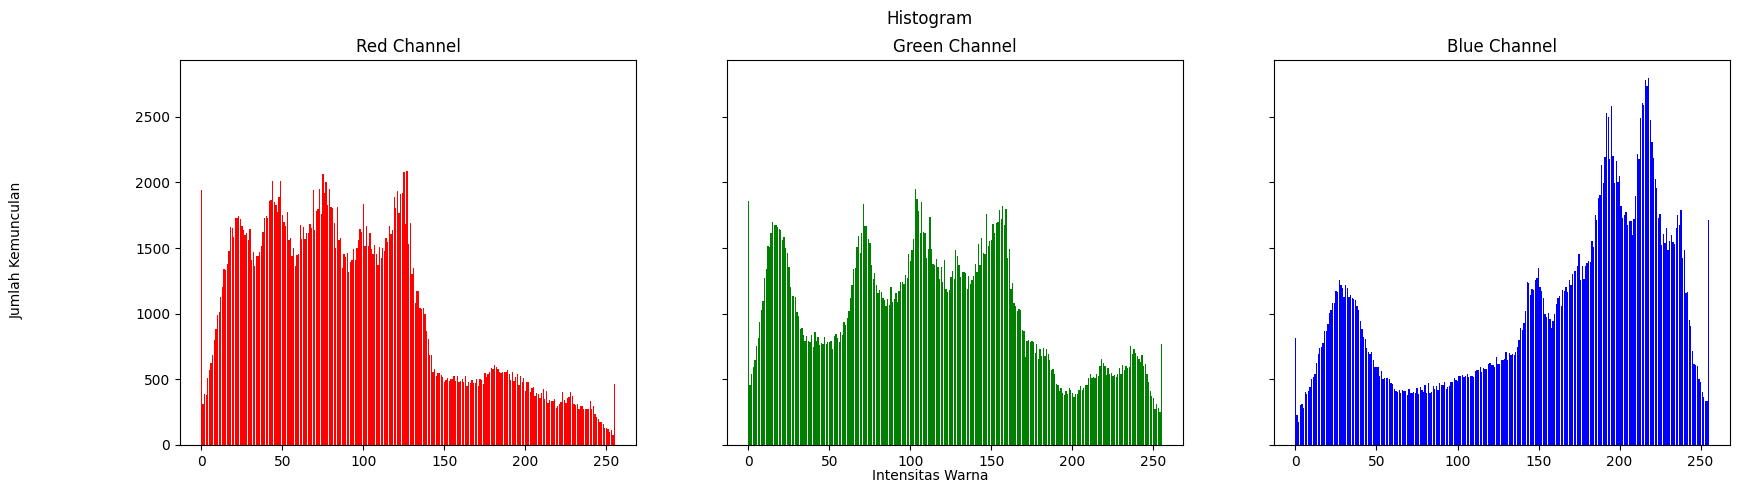

In [5]:
# Menghitung kemunculan warna pada seluruh pixel

# Inisialisasi array untuk menyimpan jumlah kemunculan intensitas warna
histogram_red = np.zeros(256)
histogram_green = np.zeros(256)
histogram_blue = np.zeros(256)

# Melakukan perulangan untuk setiap piksel, kemudian di masukkan kedalam masing-masing histogram
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        histogram_red[r] += 1
        histogram_green[g] += 1
        histogram_blue[b] += 1


# Membuat histogram untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(range(256), histogram_red.flatten(), color='red')
axs[0].set_title('Red Channel')

axs[1].bar(range(256), histogram_green.flatten(), color='green')
axs[1].set_title('Green Channel')

axs[2].bar(range(256), histogram_blue.flatten(), color='blue')
axs[2].set_title('Blue Channel')

plt.show()

4.   Membuat Histogram citra yang sama namum menggunakan library yang dimiliki oleh NumPy yaitu "histogram". Bandingkan

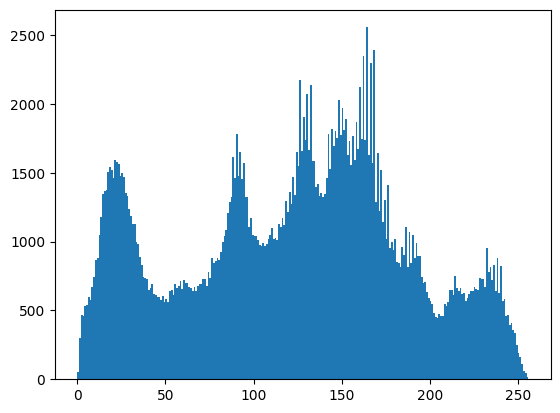

In [6]:
# Convert image ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# histogram
hist, bins = np.histogram(gray.ravel(), 256, [0, 256])

# Plot histogram using Matplotlib
plt.hist(gray.ravel(), 256, [0, 256])
plt.show()

5.   Membuat histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

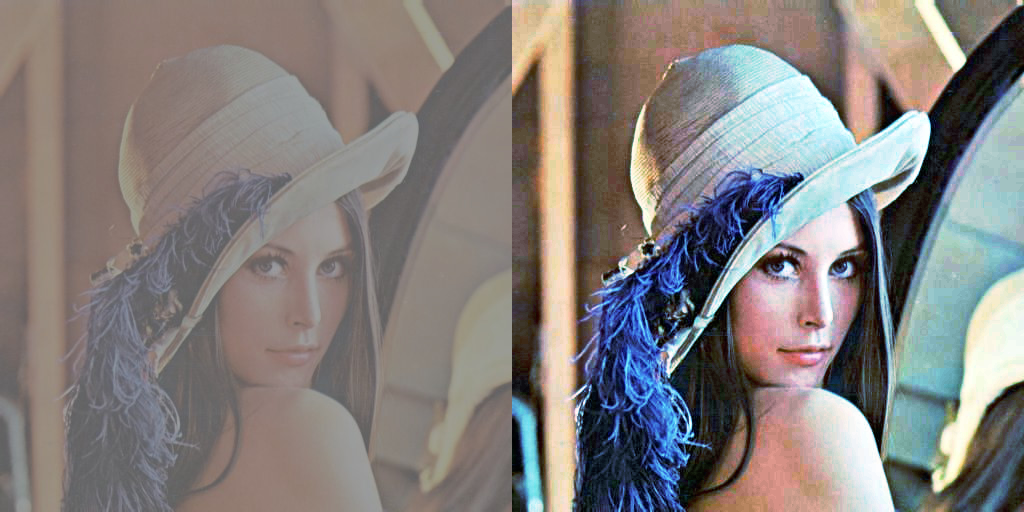

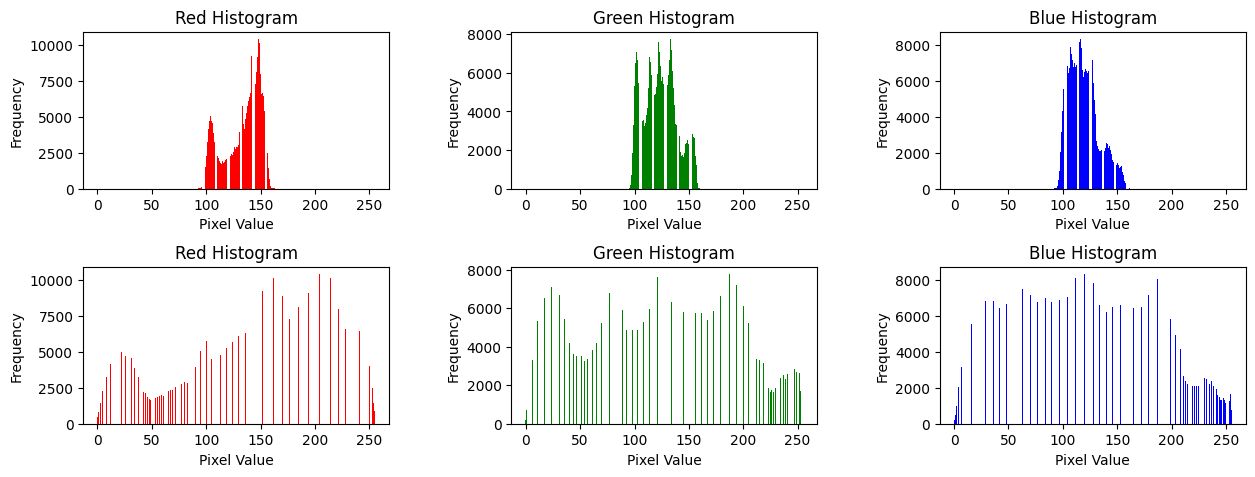

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# import gambar
img2 = cv2.imread('/content/drive/MyDrive/PCVK_2024/Week_6_Hanifah/lena_lc.jpg')

# akses per pixel dari frekuensi
def getFrequency(image, frequency):
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      frequency[image[y, x]] += 1
  return frequency

# normalisasi
def getEqualizationHistogram(normalized):
  equalized_value = [0] * 256
  for i in range(256):
    equalized_value[i] = round(normalized[i] * 255)
  return equalized_value

#Rumus K0
def createNewImage(image, equalized_array):
  new_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      new_image[y, x] = equalized_array[image[y, x]]
  return new_image

# Pemisah channel
(B, G, R) = cv2.split(img2)

# frekuensi
frequency_red = getFrequency(R, [0] * 256)
frequency_green = getFrequency(G, [0] * 256)
frequency_blue = getFrequency(B, [0] * 256)

# Kumulatif Frekuensi
cumsum_red = np.cumsum(frequency_red)
cumsum_green = np.cumsum(frequency_green)
cumsum_blue = np.cumsum(frequency_blue)

# Normalize Frequensi
normalized_red = cumsum_red / np.sum(frequency_red)
normalized_green = cumsum_green / np.sum(frequency_green)
normalized_blue = cumsum_blue / np.sum(frequency_blue)

# Equalization histogram
equalized_red = getEqualizationHistogram(normalized_red)
equalized_green = getEqualizationHistogram(normalized_green)
equalized_blue = getEqualizationHistogram(normalized_blue)

# Create new image
new_image_red = createNewImage(R, equalized_red)
new_image_green = createNewImage(G, equalized_green)
new_image_blue = createNewImage(B, equalized_blue)
new_image = cv2.merge((new_image_blue, new_image_green, new_image_red))

# Show image
final_frame = cv2.hconcat((img2, new_image))
cv2_imshow(final_frame)

# Fungsi untuk menampilkan histogram
def createBarPlot(frequency, color_name):
    plt.bar(range(256), frequency, color=color_name.lower())
    plt.title(f'{color_name} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Show plot
plt.figure(figsize=(15,4))
plt.subplot(2,3,1)
createBarPlot(frequency_red, 'Red')
plt.subplot(2,3,2)
createBarPlot(frequency_green, 'Green')
plt.subplot(2,3,3)
createBarPlot(frequency_blue, 'Blue')
plt.subplot(2,3,4)
createBarPlot(getFrequency(new_image_red, [0] * 256), 'Red')
plt.subplot(2,3,5)
createBarPlot(getFrequency(new_image_green, [0] * 256), 'Green')
plt.subplot(2,3,6)
createBarPlot(getFrequency(new_image_blue, [0] * 256), 'Blue')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

plt.show()

6.   Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?


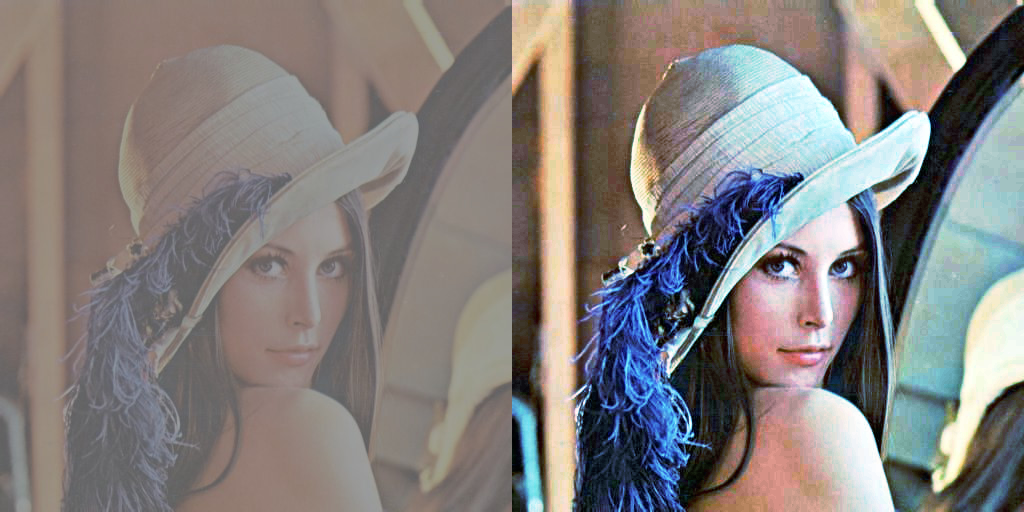

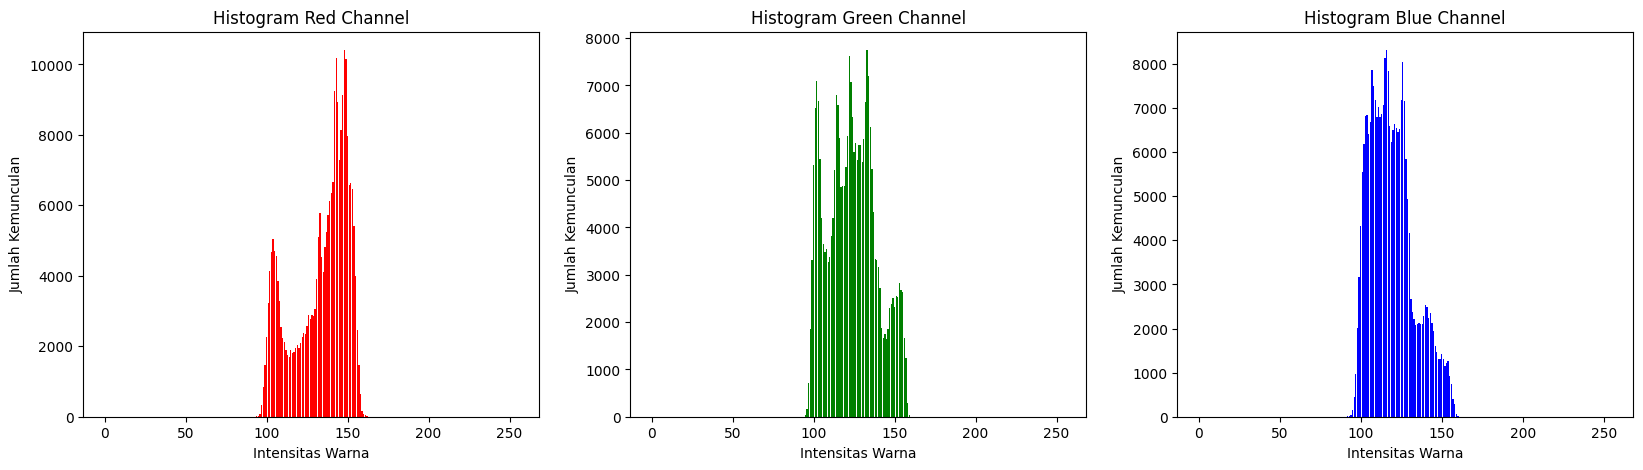

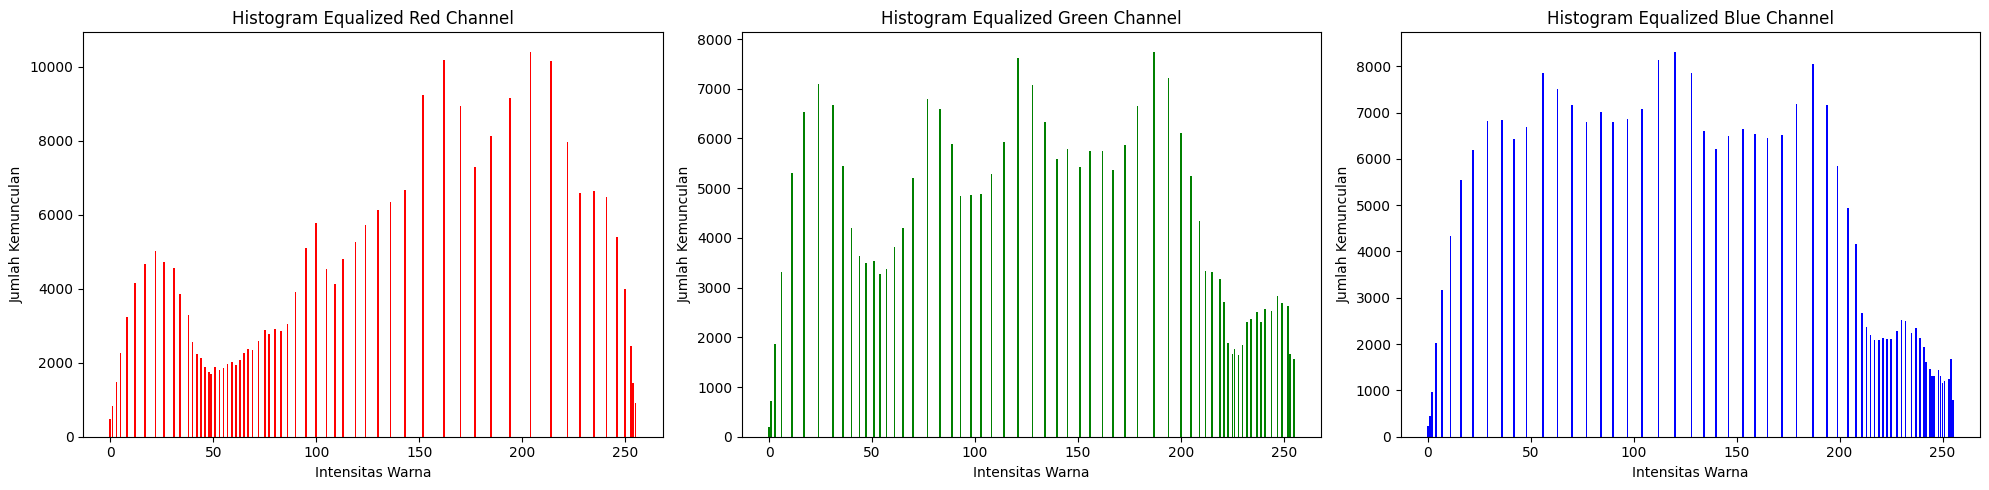

In [15]:
equalized_image = np.zeros(img2.shape, img2.dtype)

b, g, r = cv.split(img2)
red = cv.equalizeHist(r)
green = cv.equalizeHist(g)
blue = cv.equalizeHist(b)
equalized_image = cv.merge((blue, green, red))

# Menghitung histogram untuk setiap saluran warna
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Menghitung histogram untuk citra hasil ekualisasi
hist_equalized_b = cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([green], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([red], [0], None, [256], [0, 256])

# Menampilkan citra asli dan citra hasil ekualisasi histogram
final_frame = cv.hconcat((img2, equalized_image))
cv2_imshow(final_frame)

# Fungsi untuk membuat plot histogram
def createBarPlot(intensity, color, title):
    color_range = np.arange(256)
    plt.bar(color_range, intensity.ravel(), color=color)
    plt.title(title)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Membuat plot histogram untuk masing-masing saluran warna
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
createBarPlot(hist_r, 'red', 'Histogram Red Channel')
plt.subplot(1, 3, 2)
createBarPlot(hist_g, 'green', 'Histogram Green Channel')
plt.subplot(1, 3, 3)
createBarPlot(hist_b, 'blue', 'Histogram Blue Channel')

# Membuat plot histogram untuk citra hasil ekualisasi
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
createBarPlot(hist_equalized_r, 'red', 'Histogram Equalized Red Channel')
plt.subplot(1, 3, 2)
createBarPlot(hist_equalized_g, 'green', 'Histogram Equalized Green Channel')
plt.subplot(1, 3, 3)
createBarPlot(hist_equalized_b, 'blue', 'Histogram Equalized Blue Channel')
plt.tight_layout()
plt.show()

7.   Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

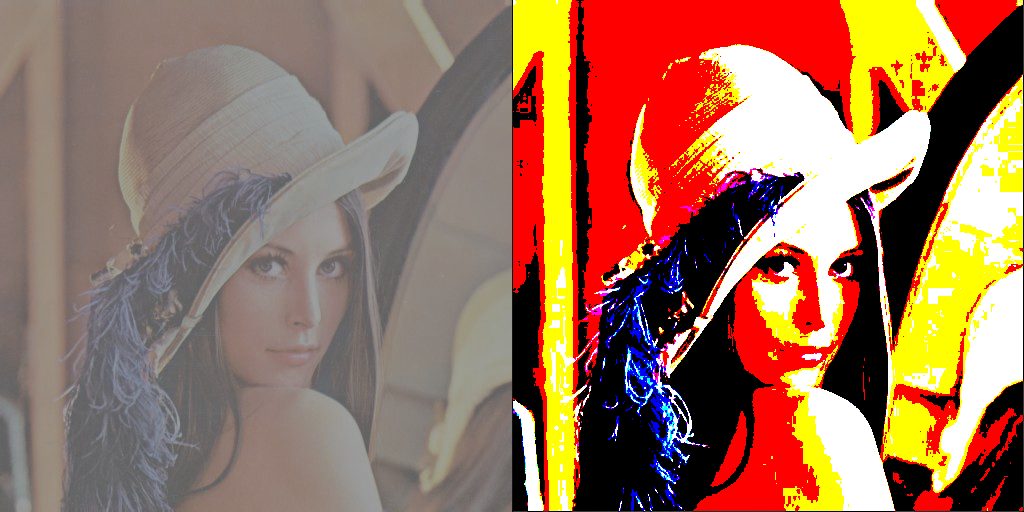

In [17]:
def threshold(color):
  if color > 255:
    return 255
  elif color < 0:
    return 0
  else:
    return color

original = cv.imread('/content/drive/MyDrive/PCVK_2024/Week_6_Hanifah/lena_lc.jpg')

(B, G, R) = cv.split(original)
img_pixel_blue = np.zeros(B.shape, B.dtype)
img_pixel_green = np.zeros(G.shape, G.dtype)
img_pixel_red = np.zeros(R.shape, R.dtype)

for y in range(0, R.shape[0] - 1):
  for x in range(1, R.shape[1] - 1):
    pixel_blue_old = B[y, x]
    pixel_green_old = G[y, x]
    pixel_red_old = R[y, x]
    pixel_distance = 1

    pixel_blue_new = np.round(pixel_distance * pixel_blue_old / 255) * (255 / pixel_distance)
    pixel_green_new = np.round(pixel_distance * pixel_green_old / 255) * (255 / pixel_distance)
    pixel_red_new = np.round(pixel_distance * pixel_red_old / 255) * (255 / pixel_distance)

    img_pixel_blue[y, x] = pixel_blue_new
    img_pixel_green[y, x] = pixel_green_new
    img_pixel_red[y, x] = pixel_red_new

    error_blue = pixel_blue_old - pixel_blue_new
    error_green = pixel_green_old - pixel_green_new
    error_red = pixel_red_old - pixel_red_new

    img_pixel_blue[y, x + 1] = threshold(img_pixel_blue[y, x + 1] + error_blue * 7/16)
    img_pixel_green[y, x + 1] = threshold(img_pixel_green[y, x + 1] + error_green * 7/16)
    img_pixel_red[y, x + 1] = threshold(img_pixel_red[y, x + 1] + error_red * 7/16)

    img_pixel_blue[y + 1, x - 1] = threshold(img_pixel_blue[y + 1, x - 1] + error_blue * 3/16)
    img_pixel_green[y + 1, x - 1] = threshold(img_pixel_green[y + 1, x - 1] + error_green * 3/16)
    img_pixel_red[y + 1, x - 1] = threshold(img_pixel_red[y + 1, x - 1] + error_red * 3/16)

    img_pixel_blue[y + 1, x] = threshold(img_pixel_blue[y + 1, x] + error_blue * 5/16)
    img_pixel_green[y + 1, x] = threshold(img_pixel_green[y + 1, x] + error_green * 5/16)
    img_pixel_red[y + 1, x] = threshold(img_pixel_red[y + 1, x] + error_red * 5/16)

    img_pixel_blue[y + 1, x + 1] = threshold(img_pixel_blue[y + 1, x + 1] + error_blue * 1/16)
    img_pixel_green[y + 1, x + 1] = threshold(img_pixel_green[y + 1, x + 1] + error_green * 1/16)
    img_pixel_red[y + 1, x + 1] = threshold(img_pixel_red[y + 1, x + 1] + error_red * 1/16)

new_image = cv.merge((img_pixel_blue, img_pixel_green, img_pixel_red))

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

Citra asli dibagi menjadi tiga saluran warna: biru (B), hijau (G), dan merah (R) menggunakan fungsi cv2.split(). Setiap saluran warna diambil terpisah dan disimpan dalam variabel b, g, dan r.

Histogram equalization dilakukan untuk setiap saluran warna (B, G, R) secara terpisah menggunakan fungsi cv2.equalizeHist(). Hasil ekualisasi histogram untuk masing-masing saluran warna disimpan dalam variabel equalized_b, equalized_g, dan equalized_r.

Hasil ekualisasi histogram untuk masing-masing saluran warna digabungkan kembali untuk membentuk citra hasil ekualisasi histogram. Ini dilakukan dengan menggunakan fungsi cv2.merge() untuk menggabungkan saluran warna yang telah diekualisasi.

8.   Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

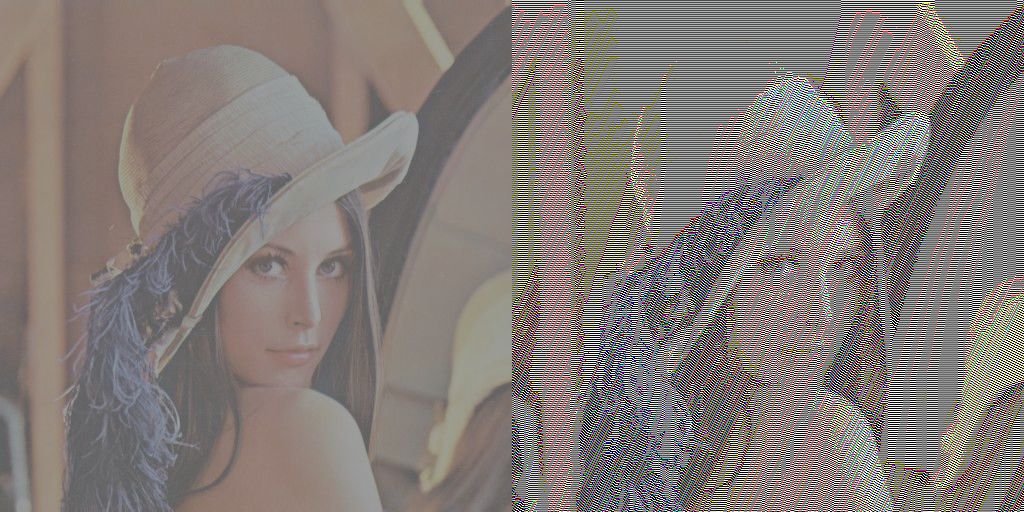

In [19]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Week_6_Hanifah/lena_lc.jpg')
b, g, r = cv.split(img)

# menerapkan dithering ke chanel
for channel in [b, g, r]:
    height, width = channel.shape

    # inisialisasi image
    new_channel = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = channel[y, x]
            new_value = 0

            if old_value > 128:
                new_value = 255

            channel[y, x] = new_value

            error = old_value - new_value

            if x < width - 1:
                new_number = channel[y, x + 1] + error * 7 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                    channel[y, x + 1] = new_number

            if x > 0 and y < height - 1:
                new_number = channel[y + 1, x - 1] + error * 3 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x - 1] = new_number

            if y < height - 1:
                new_number = channel[y + 1, x] + error * 5 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x] = new_number

            if y < height - 1 and x < width - 1:
                new_number = channel[y + 1, x + 1] + error * 1 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x + 1] = new_number
# Store dithered channel in new image
    new_channel = channel

# Merge channels into final image
new_image = cv.merge([b, g, r])

# Display original and dithered images

final_frame = cv.hconcat((img, new_image))
cv2_imshow(final_frame)

9.   Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

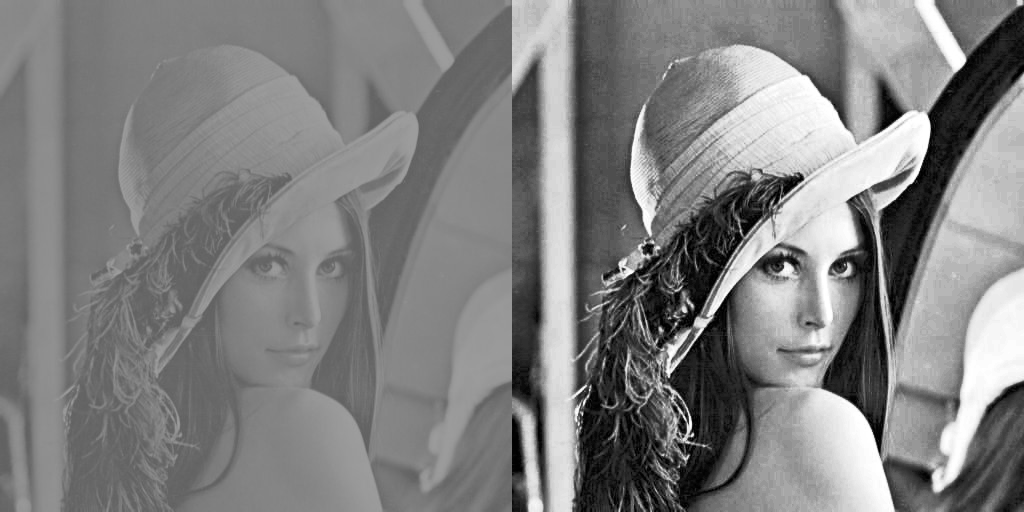

In [20]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Week_6_Hanifah/lena_lc.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_1 = np.copy(img_gray)

equalized_img = cv.equalizeHist(img_gray_1)

final_frame = cv.hconcat((img_gray, equalized_img))
cv2_imshow(final_frame)

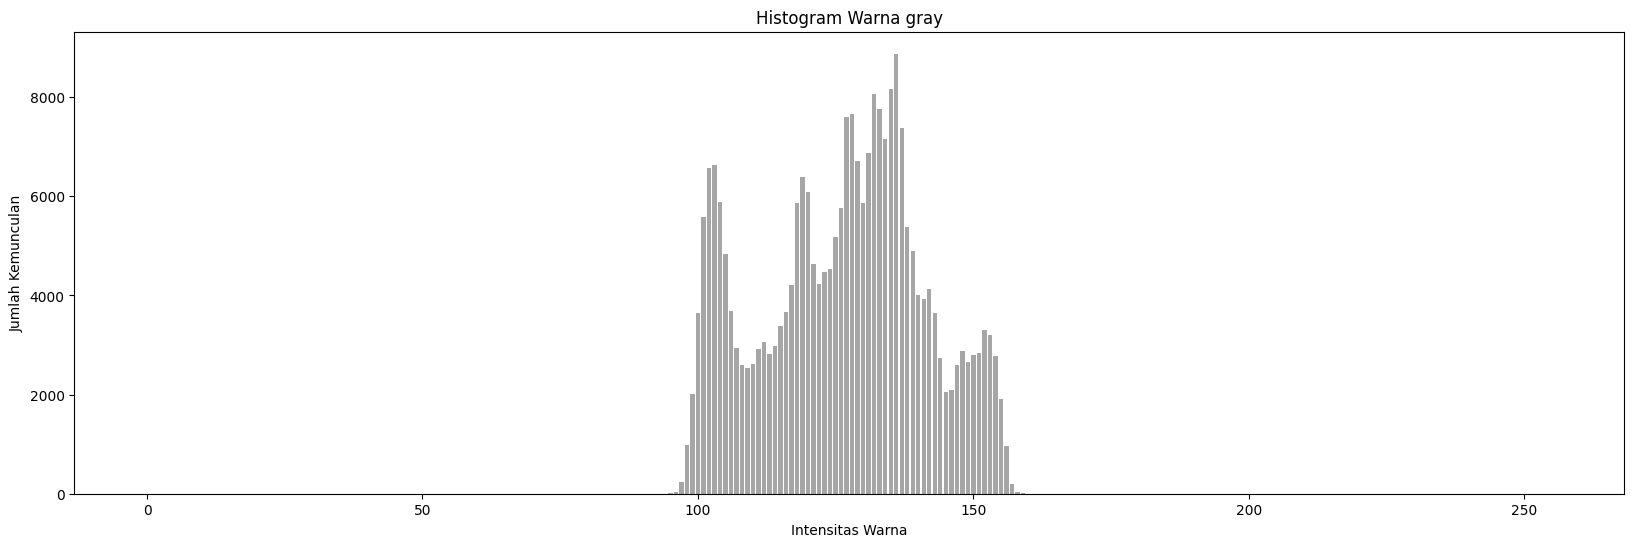

In [22]:
def histogram_gray(img):
  histogram_gray = np.zeros(256)

  # Melakukan perulangan untuk setiap piksel, kemudian di masukkan kedalam masing-masing histogram
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          pixel = img[i, j]
          histogram_gray[pixel] += 1

  plt.figure(figsize=(20, 6))
  plt.bar(range(256), histogram_gray, color='gray', alpha=0.7)
  plt.title(f'Histogram Warna gray')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

histogram_gray(img_gray)

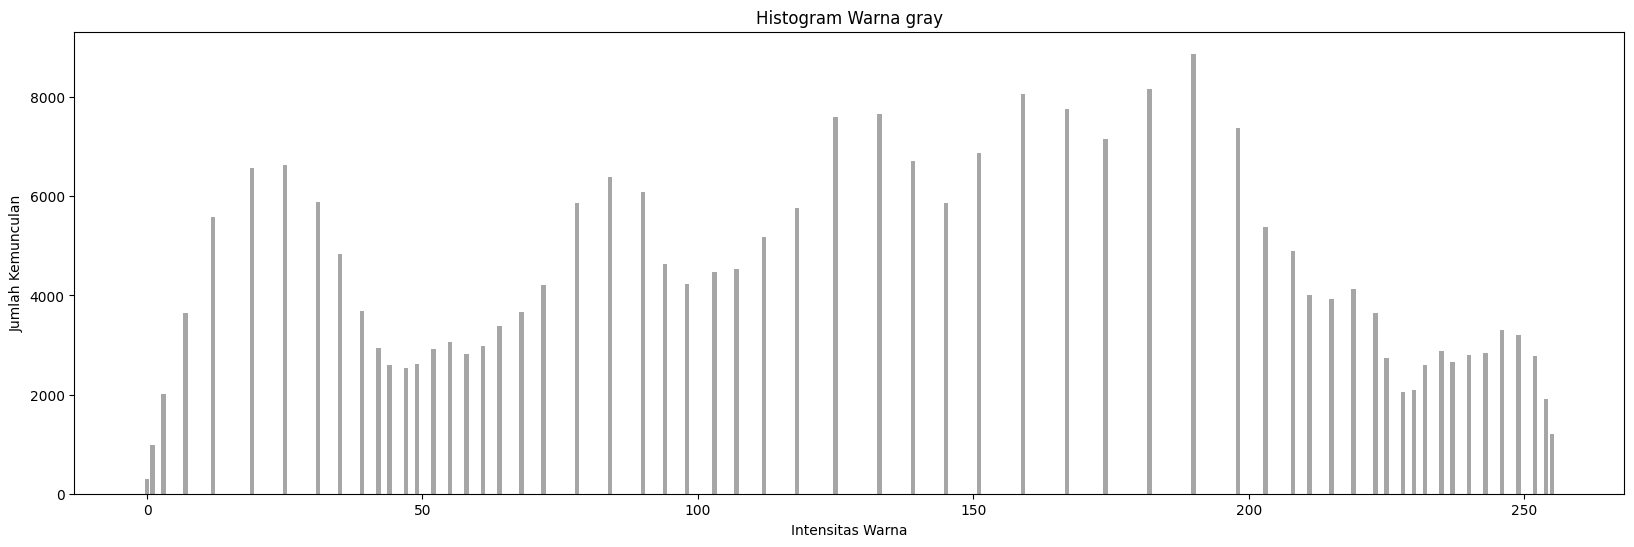

In [23]:
# Hasil Histogram setelah dilakukan equalization
histogram_gray(equalized_img)

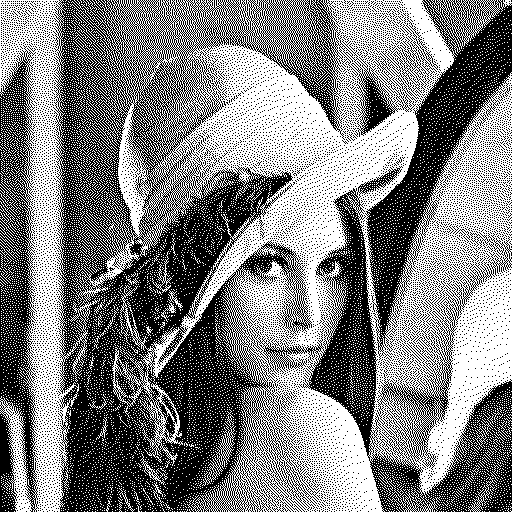

In [24]:
# Floyd-Steinberg Dithering

def floyd_steinberg_dithering_gray(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      # Jarak pixel tetangga
      pixel_old = image[y, x]

      # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
      pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

      image[y, x] = pixel_new

      error = pixel_old - pixel_new

      # Lakukan untuk semua channel warna
      # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
      if x + 1 < lebar:
        image[y, x + 1] = threshold(image[y, x + 1] + error * 7/16)
      if y + 1 < tinggi:
        if x - 1 >= 0:
          image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3/16)
        image[y + 1, x] = threshold(image[y + 1, x] + error * 5/16)
        if x + 1 < lebar:
          image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1/16)

  return image

dithering_image = floyd_steinberg_dithering_gray(equalized_img)
cv2_imshow(dithering_image)